## Face landmark using dlib

In [2]:
##importing the dependencies
import dlib
import cvlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
##helper function to convert shape(dlib shape object) into numpy array
def shape_to_np(dlib_shape,dtype='int'):
    
    ##creating the placeholder
    coordinates = np.zeros((dlib_shape.num_parts,2),dtype)
    
    for i in range(0,dlib_shape.num_parts):
        coordinates[i] = (dlib_shape.part(i).x,dlib_shape.part(i).y)
        
    return coordinates

In [3]:
def draw_shape_points(image,shape):
    for (x,y) in shape:
        #text = f'{(confidence*100):.3f}%'
        #cv2.polylines(image,(x,y),True,(255,255,0),4)
        cv2.circle(image,(x,y),3,(0,255,255),2)
        #cv2.putText(image,text,(x,y),cv2.FONT_HERSHEY_SIMPLEX,5,(255,255,0),5)
    return image

In [5]:
def draw_face(image,rect):
    startx,starty,endx,endy = rect
    cv2.rectangle(image,(startx,starty),(endx,endy),(255,0,0),2)
    return image

## using Hog features for face detection 

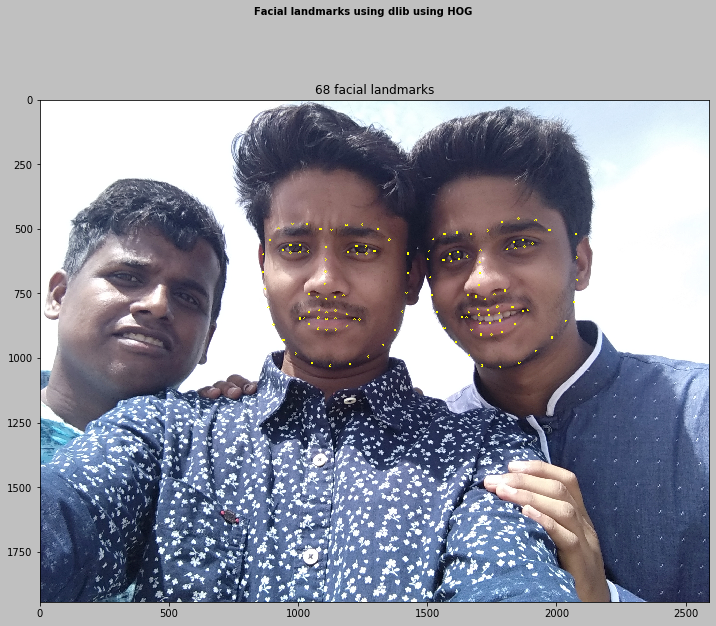

In [11]:
##loading he image
image = cv2.imread('faces.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


##face detection
detector = dlib.get_frontal_face_detector()
rects = detector(gray,0)

##facial landmark detection
p = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(p)

for (i,rect) in enumerate(rects):
    shape = predictor(image,rect)


    ##getting dlib_shape into np_array
    shape = shape_to_np(shape)


    result = draw_shape_points(image,shape)
    
fig = plt.figure(figsize=(12,10))
plt.suptitle('Facial landmarks using dlib using HOG',fontsize=10,fontweight='bold')
fig.patch.set_facecolor('silver')
plt.imshow(result[:,:,::-1])
plt.title('68 facial landmarks')
plt.show()

## Using CNN features for face detection

## using cvlib(CNN) for face detection
### Drawing all 68 facial landmarks

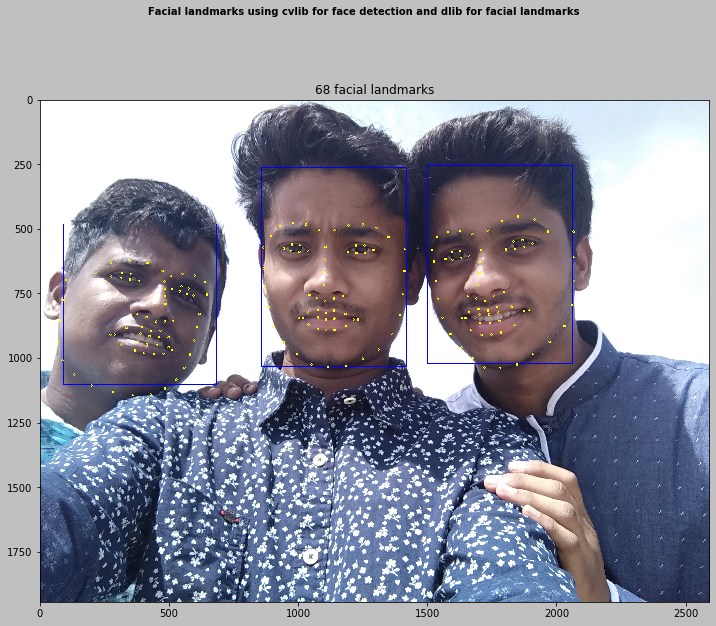

In [14]:
##loading he image
image = cv2.imread('faces.jpg')


##face detection
rects,confidence = cvlib.detect_face(image,0.7)



##facial landmark detection
p = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(p)

for (i,rect) in enumerate(rects):
    #confidence = confidence[i]
    left = rect[0]
    top = rect[1]
    right = rect[2]
    bottom = rect[3]
    shape = predictor(image,dlib.rectangle(left,top,right,bottom))



    ##getting dlib_shape into np_array
    shape = shape_to_np(shape)
    x = left
    y = top + 10 if top > 5 else top -10
    image = draw_face(image.copy(),rect)
    result = draw_shape_points(image,shape)
    
fig = plt.figure(figsize=(12,10))
plt.suptitle('Facial landmarks using cvlib for face detection and dlib for facial landmarks',fontsize=10,fontweight='bold')
fig.patch.set_facecolor('silver')
plt.imshow(result[:,:,::-1])
plt.title('68 facial landmarks')
plt.show()

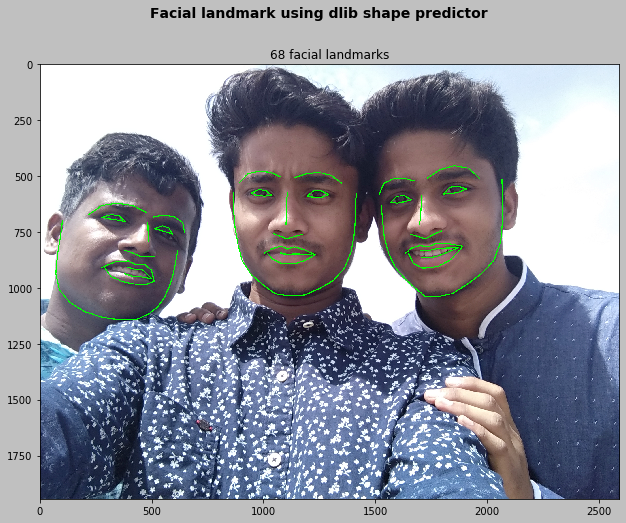

In [15]:
## Drawing polylines on all points

##range of facial landmarks
jawline_points = list(range(0,17))
right_eyebrow_points = list(range(17,22))
left_eyebrow_points = list(range(22,27))
nose_bridge_points = list(range(27,31))
lower_nose_points = list(range(31,36))
right_eye_points = list(range(36,42))
left_eye_points = list(range(42,48))
mouth_outline_points = list(range(48,61))
mouth_inline_points = list(range(61,68))
all_points = list(range(0,68))



##function to define which points to draw
def draw_shape_points_all(np_shape,image):
    
    ##points to draw
    draw_shape_points_range(np_shape,image,jawline_points)
    draw_shape_points_range(np_shape,image,right_eyebrow_points)
    draw_shape_points_range(np_shape,image,left_eyebrow_points)
    draw_shape_points_range(np_shape,image,nose_bridge_points)
    draw_shape_points_range(np_shape,image,lower_nose_points)
    draw_shape_points_range(np_shape,image,right_eye_points,True)
    draw_shape_points_range(np_shape,image,left_eye_points,True)
    draw_shape_points_range(np_shape,image,mouth_outline_points)
    draw_shape_points_range(np_shape,image,mouth_inline_points)

    
def draw_shape_points_range(np_shape,image,points,isClosed=False):
    shape = np_shape[points]
    pts = np.array(shape,dtype=np.int32)
    cv2.polylines(image,[pts],isClosed,(0,255,0),3,cv2.LINE_8)
    
    
##face detection   
image = cv2.imread('faces.jpg')
rects,confidence = cvlib.detect_face(image,0.8)



##loading and getting shape prediction
p = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(p)

for rect in rects:
    left = rect[0]
    top = rect[1]
    right = rect[2]
    bottom  = rect[3]
    
    shape = predictor(image,dlib.rectangle(left,top,right,bottom))
    
    ##convert dlib.shape object into numpy array
    np_shape = shape_to_np(shape)

    ##drawing facial landmarks
    draw_shape_points_all(np_shape,image)


##showing image

fig = plt.figure(figsize=(12,8))
plt.suptitle('Facial landmark using cvlib',fontsize=14,fontweight='bold')
fig.patch.set_facecolor('silver')
plt.imshow(image[:,:,::-1])
plt.title('68 facial landmarks')
plt.show()

## using pre-trained caffe model for face detection

3


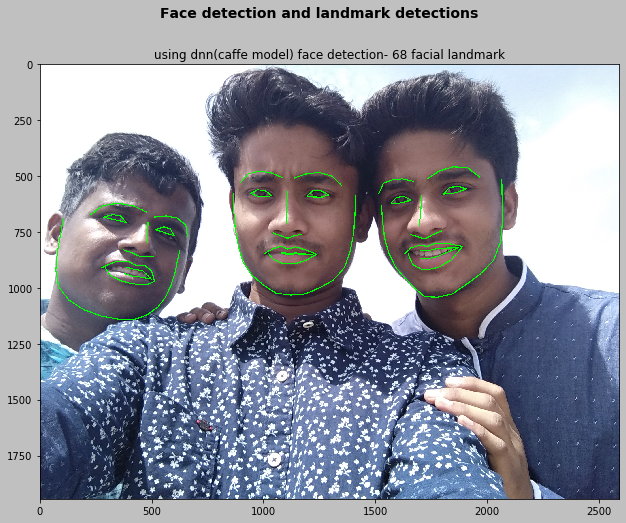

In [16]:
jawline_points = list(range(0,17))
right_eyebrow_points = list(range(17,22))
left_eyebrow_points = list(range(22,27))
nose_bridge_points = list(range(27,31))
lower_nose_points = list(range(31,36))
right_eye_points = list(range(36,42))
left_eye_points = list(range(42,48))
mouth_outline_points = list(range(48,61))
mouth_inline_points = list(range(61,68))
all_points = list(range(0,68))



##function to define which points to draw
def draw_shape_points_all(np_shape,image):
    
    ##points to draw
    draw_shape_points_range(np_shape,image,jawline_points)
    draw_shape_points_range(np_shape,image,right_eyebrow_points)
    draw_shape_points_range(np_shape,image,left_eyebrow_points)
    draw_shape_points_range(np_shape,image,nose_bridge_points)
    draw_shape_points_range(np_shape,image,lower_nose_points)
    draw_shape_points_range(np_shape,image,right_eye_points,True)
    draw_shape_points_range(np_shape,image,left_eye_points,True)
    draw_shape_points_range(np_shape,image,mouth_outline_points)
    draw_shape_points_range(np_shape,image,mouth_inline_points)

    
def draw_shape_points_range(np_shape,image,points,isClosed=False):
    shape = np_shape[points]
    pts = np.array(shape,dtype=np.int32)
    cv2.polylines(image,[pts],isClosed,(0,255,0),3,cv2.LINE_8)





net = cv2.dnn.readNetFromCaffe("/models/deploy.prototxt","models/res10_300x300_ssd_iter_140000_fp16.caffemodel")
image = cv2.imread('faces.jpg')
blob = cv2.dnn.blobFromImage(image,1.0,(300,300),[147.0,177.0,123.0],False,False)
net.setInput(blob)
detections = net.forward()
p = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(p)
h,w = image.shape[:2]
detected_face = 0

for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2]
    
    if confidence > 0.7:
        detected_face += 1
        box = detections[0,0,i,3:7] * np.array([w,h,w,h])
        (startx,starty,endx,endy) = box.astype('int')
        shape = predictor(image,dlib.rectangle(startx,starty,endx,endy))
        np_shape = shape_to_np(shape)
        draw_shape_points_all(np_shape,image)

print(detected_face)
fig = plt.figure(figsize=(12,8))
plt.suptitle('Face detection and landmark detections',fontsize=14,fontweight='bold')
fig.patch.set_facecolor('silver')
plt.imshow(image[:,:,::-1])
plt.title('using dnn(caffe model) face detection- 68 facial landmark')
plt.show()

## video processing

In [11]:
##facial landmark detection
p = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(p)

vs = cv2.VideoCapture(0)

while True:
    ##loading he image
    rot,frame = vs.read()

    ##face detection
    rects,confidence = cvlib.detect_face(frame,0.7)





    for (i,rect) in enumerate(rects):
        #confidence = confidence[i]
        left = rect[0]
        top = rect[1]
        right = rect[2]
        bottom = rect[3]
        shape = predictor(frame,dlib.rectangle(left,top,right,bottom))



        ##getting dlib_shape into np_array
        shape = shape_to_np(shape)
        x = left
        y = top + 10 if top > 5 else top -10
        image = draw_face(frame.copy(),rect)
        draw_shape_points_pos(image,shape)
        cv2.imshow('Frame',image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vs.release()
cv2.destroyAllWindows()

In [10]:
right_eye_points = list(range(36,42))
left_eye_points = list(range(42,48))

def draw_shape_points_pos(image,np_shape):
    draw_points(image,np_shape,right_eye_points,True)
    draw_points(image,np_shape,left_eye_points,True)
    
    
def draw_points(image,np_shape,range_points,isClosed=False):
    shape_display = np_shape[range_points]
    pts = np.array(shape_display,dtype=np.int32)
    cv2.polylines(image,[pts],isClosed,(0,255,0),1,cv2.LINE_8)
    